# Importação das Bibliotecas 
Realizando o processo de import para todas as bibliotecas necessárias para rodar o notebook 

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

## Importando a database

Aqui, eu importei a database utilizando da biblioteca YFinance, que fornece algumas informações sobre a operação do bitcoin. Além disso, eu comecei a ver a base de dados que estava lidando, compreendendo sua formatação e como os dados estavam organizados.

In [2]:
# get historical market data
df_bitcoin = yf.download(tickers="BTC-USD", period="5y", interval="1d")

df_bitcoin.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-29,8246.037109,8261.707031,7990.497070,8104.185547,8104.185547,13034629109
2019-09-30,8104.226562,8314.231445,7830.758789,8293.868164,8293.868164,17115474183
2019-10-01,8299.720703,8497.692383,8232.679688,8343.276367,8343.276367,15305343413
2019-10-02,8344.212891,8393.041992,8227.695312,8393.041992,8393.041992,13125712443
2019-10-03,8390.774414,8414.227539,8146.437012,8259.992188,8259.992188,13668823409


In [ ]:
df_bitcoin.info()

Aqui, verifiquei se havia algum dado nulo, para não criar novas features e deixar linhas vazias.

In [3]:
colunas = df_bitcoin.columns
print("Contagem de nulls por coluna: \n")
for coluna in colunas:
    print(f'{coluna}:{df_bitcoin[coluna].isna().sum()}')

Contagem de nulls por coluna: 

Open:0
High:0
Low:0
Close:0
Adj Close:0
Volume:0


## Feature Engineering

Para conseguir criar um modelo mais eficiente, pensei em algumas features que poderiam ser úteis ao modelo. Assim, implementei features como a variação percentual e amplitude do dia.

In [4]:
for coluna in colunas:
    df_bitcoin[coluna] = df_bitcoin[coluna].apply(lambda x: round(x, 2))
df_bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-28,8251.27,8285.62,8125.43,8245.92,8245.92,14141152736
2019-09-29,8246.04,8261.71,7990.50,8104.19,8104.19,13034629109
2019-09-30,8104.23,8314.23,7830.76,8293.87,8293.87,17115474183
2019-10-01,8299.72,8497.69,8232.68,8343.28,8343.28,15305343413
2019-10-02,8344.21,8393.04,8227.70,8393.04,8393.04,13125712443


In [6]:
df_bitcoin["Percentage_Variation"] = 100*(df_bitcoin["Close"] - df_bitcoin["Open"])/df_bitcoin["Open"] 
df_bitcoin.head()

SyntaxError: unterminated string literal (detected at line 2) (3869429206.py, line 2)

In [6]:
df_bitcoin["Amplitude"] = df_bitcoin["High"] - df_bitcoin["Low"]
df_bitcoin.head()

,Open,High,Low,Close,Adj Close,Volume,Percentage_Variation,Amplitude
Date,,,,,,,,
2019-09-28,8251.27,8285.62,8125.43,8245.92,8245.92,14141152736,-0.064839,160.19
2019-09-29,8246.04,8261.71,7990.50,8104.19,8104.19,13034629109,-1.720220,271.21
2019-09-30,8104.23,8314.23,7830.76,8293.87,8293.87,17115474183,2.340013,483.47
2019-10-01,8299.72,8497.69,8232.68,8343.28,8343.28,15305343413,0.524837,265.01
2019-10-02,8344.21,8393.04,8227.70,8393.04,8393.04,13125712443,0.585196,165.34


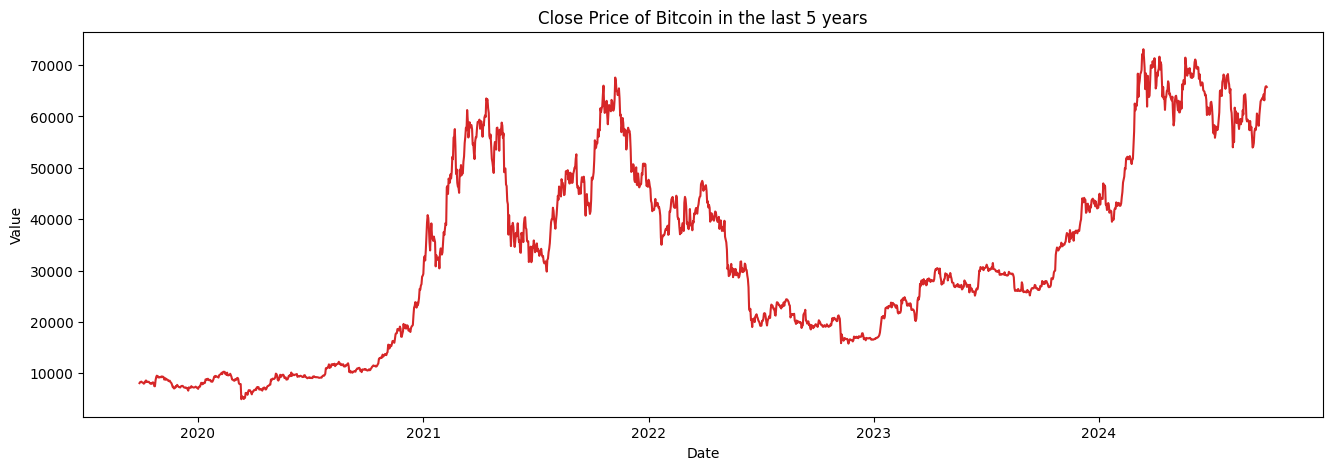

In [4]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df_bitcoin, x=df_bitcoin.index, y=df_bitcoin["Close"], title='Close Price of Bitcoin in the last 5 years')    


## Normalização dos dados

Para normalizar os dados, utilizei a técnica de Min-Max Scaling, que transforma os valores das colunas para um intervalo entre 0 e 1. Isso é útil para algoritmos de machine learning que são sensíveis à escala dos dados.


In [7]:
from sklearn.preprocessing import MinMaxScaler

# Inicializando o MinMaxScaler
scaler = MinMaxScaler()

# Normalizando as colunas numéricas
df_bitcoin[['Open', 'High', 'Low', 'Adj Close', 'Volume', "Amplitude", "Percentage_Variation"]] = scaler.fit_transform(df_bitcoin[['Open', 'High', 'Low', 'Adj Close', 'Volume', "Amplitude", "Percentage_Variation"]])

df_bitcoin.head()


ModuleNotFoundError: No module named 'sklearn'